In [1]:
import tensorflow as tf
import numpy as np

from keras import applications
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras import optimizers
from keras.models import Sequential, Model 
from keras.models import load_model
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, Input, Lambda
from keras import backend as k 
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
from keras import applications
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
from keras import optimizers, callbacks
from keras import regularizers
import math
import sklearn as sk
import pandas as pd
from sklearn.metrics import confusion_matrix
from keras.callbacks import ModelCheckpoint

#import cv2

gpu_options = tf.GPUOptions(allow_growth=True)
session = tf.InteractiveSession(config=tf.ConfigProto(gpu_options=gpu_options))



Using TensorFlow backend.


In [2]:
# dimensions of our images.
img_width, img_height = 256, 256 
crop_size = (256, 256)

base_model_path = 'model_best.h5'

train_data_dir ='Apical4_AdditionalDepths_Only_1to7_WithInterleave/Train'
validation_data_dir ='Apical4_AdditionalDepths_Only_1to7_WithInterleave/Validation'
test_data_dir ='Apical4_AdditionalDepths_Only_1to7_WithInterleave/Test'


# number of epochs to train top model
nepochs = 40 

# batch size used by flow_from_directory and predict_generator
batch_size=32


In [3]:
#base_model1 = load_model(base_model_path)
#base_model1.summary()

In [4]:
#base_model = Model(inputs=base_model1.input, outputs=base_model1.get_layer('mixed10').output)
#base_model.summary()

In [5]:
def mean_subtract(img):   
#     img = tf.subtract(img, 35.5161)
    img = tf.subtract(img, 41.89329/255.0)
    return img

Found 13969 images belonging to 7 classes.
Found 3344 images belonging to 7 classes.
7
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 12)                21826796  
_________________________________________________________________
dense_1 (Dense)              (None, 64)                832       
____________________________________

436/436 [==============================] - 6444s 15s/step - loss: 0.0883 - acc: 0.9791 - val_loss: 0.1389 - val_acc: 0.9580

Epoch 00028: val_acc did not improve from 0.97403
Epoch 29/40
436/436 [==============================] - 6425s 15s/step - loss: 0.0990 - acc: 0.9769 - val_loss: 0.1144 - val_acc: 0.9686

Epoch 00029: val_acc did not improve from 0.97403
Epoch 30/40
436/436 [==============================] - 6427s 15s/step - loss: 0.0880 - acc: 0.9792 - val_loss: 0.1072 - val_acc: 0.9662

Epoch 00030: val_acc did not improve from 0.97403
Epoch 31/40
436/436 [==============================] - 6540s 15s/step - loss: 0.0846 - acc: 0.9806 - val_loss: 0.1078 - val_acc: 0.9650

Epoch 00031: val_acc did not improve from 0.97403
Epoch 32/40
436/436 [==============================] - 6747s 15s/step - loss: 0.0789 - acc: 0.9820 - val_loss: 0.1027 - val_acc: 0.9650

Epoch 00032: val_acc did not improve from 0.97403
Epoch 33/40
436/436 [==============================] - 6663s 15s/step - loss:

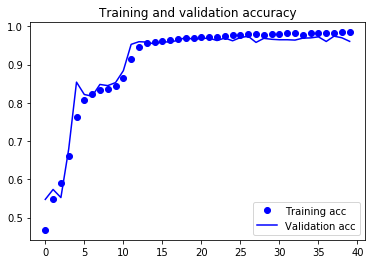

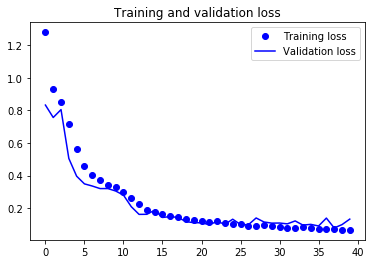

(3312, 7)
[[1.03481834e-05 2.56494855e-06 1.12755260e-04 ... 2.78107793e-04
  9.99124110e-01 4.46532824e-04]
 [9.87619296e-06 2.40976306e-06 1.09835782e-04 ... 2.92550074e-04
  9.99151111e-01 4.08658409e-04]
 [1.04254359e-05 2.59287231e-06 1.15321011e-04 ... 2.94490659e-04
  9.99125898e-01 4.25061386e-04]
 ...
 [1.12946481e-07 1.39754883e-08 5.94693447e-05 ... 9.89692271e-01
  1.01503534e-02 1.07236275e-10]
 [1.45183435e-07 1.81871620e-08 7.05369457e-05 ... 9.86692131e-01
  1.31255286e-02 1.71146278e-10]
 [8.40437133e-06 1.40700092e-06 5.88619616e-04 ... 1.21611856e-01
  8.77425194e-01 1.87506134e-06]]


In [6]:
train_datagen_top = ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=False,
    height_shift_range=0.05, #0.2, #
    width_shift_range=0.05, #0.2, #
    rotation_range=15, #40, #15,
    shear_range=0.2,
    brightness_range=[0.5,1.5],
    zoom_range=[0.9,1.25],
    rescale=1/255.0)

# train generator
train_generator_top = train_datagen_top.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical',
    shuffle=True)


nb_train_samples = len(train_generator_top.filenames)
num_classes = len(train_generator_top.class_indices)

train_labels = train_generator_top.classes
train_labels = to_categorical(train_labels, num_classes= num_classes)

#validation generator
valid_datagen_top = ImageDataGenerator(rescale=1. / 255)

valid_generator_top = valid_datagen_top.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical', 
    shuffle=False) #True

nb_validation_samples = len(valid_generator_top.filenames)
validation_labels = valid_generator_top.classes
validation_labels = to_categorical(
    validation_labels, num_classes=num_classes)


print(len(train_generator_top.class_indices))
print(train_labels)
print(validation_labels)

# crop
#train_generator_crops = crop_generator(train_generator_top, crop_size)
#validation_generator_crops = crop_generator(valid_generator_top, crop_size)


#######
base_model = load_model(base_model_path)
#base_model.layers.pop()
#base_model.outputs = [base_model.layers[-1].output]
#base_model.layers[-1].outbound_nodes = []
#base_model.summary()
base_model.built = False 

input_shape = (256,256,1)
model_input = Input(shape = input_shape)
model_input = Lambda(mean_subtract, name='mean_subtraction')(model_input)
base_model.Input = model_input


#########
## dense model
model = Sequential()
model.add(base_model) # add base model
#model.add(Flatten())
#model.add(Dense(256, activation='relu'))
#model.add(Dense(128, activation='relu'))
#model.add(Dense(128, kernel_regularizer=regularizers.l2(0.001),activation='relu'))
#model.add(Dense(64, kernel_regularizer=regularizers.l2(0.001),activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
#model.add(Dense(16, kernel_regularizer=regularizers.l2(0.001),activation='relu'))
#model.add(Dropout(0.4))
#model.add(Dense(64, activation='relu')) # new
#model.add(Dropout(0.5)) #new
#model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary() 



print("[INFO] compile...")
#model.compile(optimizer='rmsprop',
#            loss='categorical_crossentropy', metrics=['accuracy'])


#sgd = optimizers.SGD(lr=1e-3, decay=1e-6, momentum=0.9, nesterov=True)
mydecay = 0.0005
mymomentum = 0.9
mylr = 0.01 #0.009 #0.01 #0.03 #0.001 #0.1 #0.01
sgd = optimizers.SGD(lr=mylr, decay=mydecay, momentum=mymomentum)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

print("[INFO] model fit...")
#history = model.fit_generator(train_generator_crops,
#                    steps_per_epoch= nb_train_samples//batch_size, #100, #50,  #1000,
#                    epochs= nepochs,
#                    validation_data= validation_generator_crops,
#                    validation_steps= nb_validation_samples//batch_size, #50, #8, #50, # 800,
#                    verbose=1)

from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('MyApical4Depth_additionaldepths_only_1to7_withInterleave.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

history = model.fit_generator(
    train_generator_top,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=nepochs,
    validation_data= valid_generator_top,
    validation_steps=nb_validation_samples//batch_size,
    callbacks=callbacks_list,
    verbose=1)

#history = model.fit_generator(train_generator_top,
#                steps_per_epoch= nb_train_samples//batch_size, #100, #50,  #1000,
#                epochs= nepochs,
#                validation_data= valid_generator_top,
#                validation_steps= nb_validation_samples//batch_size, #50, #8, #50, # 800,
#                verbose=1)
#

#base_model.save_weights(top_model_weights_path)

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

predictions= model.predict_generator(valid_generator_top, steps = nb_validation_samples // batch_size)
y_classes = predictions.argmax(axis=-1)
print(predictions.shape)
print (predictions)

    

In [7]:
import pandas as pd
model.evaluate_generator(generator=valid_generator_top, steps = nb_validation_samples // batch_size)


# create test generator with valid directory ( due to lack of data)
valid_generator = valid_datagen_top.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=1,
    color_mode='grayscale',
    class_mode=None, 
    shuffle=False,
    seed=42) 

valid_generator.reset()
pred=model.predict_generator(valid_generator,steps = len(valid_generator), verbose=1)
predicted_class_indices=np.argmax(pred,axis=1)

labels = (train_generator_top.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

#predictions= model.predict_generator(valid_generator_top, steps = nb_validation_samples // batch_size)
#y_classes = predictions.argmax(axis=-1)
#print(predictions.shape)
#print (predictions)

print(len(predictions))

filenames=valid_generator.filenames
#print(filenames.shape)
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
results.to_csv("results_validation.csv",index=False)

Found 3344 images belonging to 7 classes.
3344/3344 [==============================] - 408s 122ms/step
3344


In [8]:
#print (predictions)
import sklearn as sk
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np

#confusion_matrix(valid_generator_top.classes, y_classes)
print('Confusion MatrixPredict...')
valid_generator.reset()
predCM=model.predict_generator(valid_generator,steps = len(valid_generator),verbose=1)
y_pred = predCM.argmax(axis=-1) #np.argmax(predictions, axis=1)
print('Confusion Matrix')
print(confusion_matrix(valid_generator.classes, y_pred))
print('Classification Report')
target_names = ['Depth1', 'Depth2', 'Depth3', 'Depth4', 'Depth5','Depth6','Depth7' ]
print(classification_report(valid_generator.classes, y_pred, target_names=target_names))

Confusion MatrixPredict...
3344/3344 [==============================] - 397s 119ms/step
Confusion Matrix
[[487  13   0   0   0   0   0]
 [  0 401  44   0   0   0   0]
 [  0   3 469  39   0   0   0]
 [  0   0  14 471  11   0   0]
 [  0   0   0   0 462   2   0]
 [  0   0   0   0   0 462   2]
 [  0   0   0   0   0   2 462]]
Classification Report
              precision    recall  f1-score   support

      Depth1       1.00      0.97      0.99       500
      Depth2       0.96      0.90      0.93       445
      Depth3       0.89      0.92      0.90       511
      Depth4       0.92      0.95      0.94       496
      Depth5       0.98      1.00      0.99       464
      Depth6       0.99      1.00      0.99       464
      Depth7       1.00      1.00      1.00       464

   micro avg       0.96      0.96      0.96      3344
   macro avg       0.96      0.96      0.96      3344
weighted avg       0.96      0.96      0.96      3344



In [9]:
import pandas as pd

test_data_dir ='Apical4_AdditionalDepths_Only_1to7_WithInterleave/Test'

test_datagen_top = ImageDataGenerator(rescale=1. / 255)

test_generator_top = test_datagen_top.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical', 
    shuffle=False) #True

nb_test_samples = len(test_generator_top.filenames)

test_loss, test_acc = model.evaluate_generator(generator=test_generator_top, steps = nb_test_samples//batch_size)

print('test acc:', test_acc)

# create test generator with actual test data
test_generator = test_datagen_top.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=1,
    color_mode='grayscale',
    class_mode=None, 
    shuffle=False,
    seed=42) 



test_generator.reset()
pred=model.predict_generator(test_generator, steps = len(test_generator), verbose=1)
predicted_class_indices=np.argmax(pred,axis=1)

labels = (train_generator_top.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

#predictions= model.predict_generator(valid_generator_top, steps = nb_validation_samples // batch_size)
#y_classes = predictions.argmax(axis=-1)
#print(predictions.shape)
#print (predictions)

filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
results.to_csv("results_forTestdata.csv",index=False)

Found 1658 images belonging to 7 classes.
test acc: 0.9693627450980392
Found 1658 images belonging to 7 classes.
1658/1658 [==============================] - 197s 119ms/step


In [10]:
#print (predictions)
import sklearn as sk
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np

#confusion_matrix(valid_generator_top.classes, y_classes)
print('Confusion MatrixPredict...')
test_generator.reset()
predCM=model.predict_generator(test_generator,steps = len(test_generator), verbose=1)
y_pred = predCM.argmax(axis=-1) #np.argmax(predictions, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))
print('Classification Report')
target_names = ['Depth1', 'Depth2', 'Depth3', 'Depth4', 'Depth5','Depth6','Depth7']
print(classification_report(test_generator.classes, y_pred, target_names=target_names))



Confusion MatrixPredict...
1658/1658 [==============================] - 198s 119ms/step
Confusion Matrix
[[235  12   0   0   0   0   0]
 [  0 199  16   0   0   0   0]
 [  0   0 209  20   0   0   0]
 [  0   0   1 239   1   0   0]
 [  0   0   0   0 242   0   0]
 [  0   0   0   0   0 242   0]
 [  0   0   0   0   0   0 242]]
Classification Report
              precision    recall  f1-score   support

      Depth1       1.00      0.95      0.98       247
      Depth2       0.94      0.93      0.93       215
      Depth3       0.92      0.91      0.92       229
      Depth4       0.92      0.99      0.96       241
      Depth5       1.00      1.00      1.00       242
      Depth6       1.00      1.00      1.00       242
      Depth7       1.00      1.00      1.00       242

   micro avg       0.97      0.97      0.97      1658
   macro avg       0.97      0.97      0.97      1658
weighted avg       0.97      0.97      0.97      1658



In [11]:

'''
print ( type(predCM))
print (predCM.shape)
print(predCM > 0.9)
thresval = (predCM > 0.9).astype(int).sum(axis=1)
print(thresval.shape)
print(thresval)
sumthresval_d12 = predCM[:,0]+predCM[:,1]
sumthresval_d23 = predCM[:,1]+predCM[:,2]
sumthresval_d34 = predCM[:,2]+predCM[:,3]
sumthresval = np.stack((sumthresval_d12,sumthresval_d23,sumthresval_d34),axis=1)
print(sumthresval.shape)
predictions = []
for i,v in enumerate(thresval):
    if v==0:
        if sumthresval[i,:].max()>0.9:
            print(np.argmax(sumthresval[i,:])+0.5)
            predictions.append(np.argmax(sumthresval[i,:])+0.5)
        else:
            print('fail')
            predictions.append(-1)
    else:
        print(np.argmax(predCM[i,:]))
        predictions.append(np.argmax(predCM[i,:]))    

labelsval = {-1:'f',0:'1',0.5:'1.5',1.0:'2',1.5:'2.5',2.0:'3',2.5:'3.5',3.0:'4'}
predictions = [labelsval[k] for k in predictions]

filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
results.to_csv("results_forTestdata_WithThresholdVal.csv",index=False)
'''


'\nprint ( type(predCM))\nprint (predCM.shape)\nprint(predCM > 0.9)\nthresval = (predCM > 0.9).astype(int).sum(axis=1)\nprint(thresval.shape)\nprint(thresval)\nsumthresval_d12 = predCM[:,0]+predCM[:,1]\nsumthresval_d23 = predCM[:,1]+predCM[:,2]\nsumthresval_d34 = predCM[:,2]+predCM[:,3]\nsumthresval = np.stack((sumthresval_d12,sumthresval_d23,sumthresval_d34),axis=1)\nprint(sumthresval.shape)\npredictions = []\nfor i,v in enumerate(thresval):\n    if v==0:\n        if sumthresval[i,:].max()>0.9:\n            print(np.argmax(sumthresval[i,:])+0.5)\n            predictions.append(np.argmax(sumthresval[i,:])+0.5)\n        else:\n            print(\'fail\')\n            predictions.append(-1)\n    else:\n        print(np.argmax(predCM[i,:]))\n        predictions.append(np.argmax(predCM[i,:]))    \n\nlabelsval = {-1:\'f\',0:\'1\',0.5:\'1.5\',1.0:\'2\',1.5:\'2.5\',2.0:\'3\',2.5:\'3.5\',3.0:\'4\'}\npredictions = [labelsval[k] for k in predictions]\n\nfilenames=test_generator.filenames\nresult

In [12]:
'''
import pandas as pd

test_data_dir2 ='Apical4_AdditionalDepths_1to8/Test_2'

test_datagen_top2 = ImageDataGenerator(rescale=1. / 255)

test_generator_top2 = test_datagen_top2.flow_from_directory(
    test_data_dir2,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical', 
    shuffle=False) #True

test_loss2, test_acc2 = model.evaluate_generator(generator=test_generator_top2)

print('test acc_2:', test_acc2)

# create test generator with actual test data
test_generator2 = test_datagen_top2.flow_from_directory(
    test_data_dir2,
    target_size=(img_width, img_height),
    batch_size=1,
    color_mode='grayscale',
    class_mode=None, 
    shuffle=False,
    seed=42) 



test_generator2.reset()
pred2=model.predict_generator(test_generator2,verbose=1)
predicted_class_indices=np.argmax(pred2,axis=1)

labels = (train_generator_top.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

#predictions= model.predict_generator(valid_generator_top, steps = nb_validation_samples // batch_size)
#y_classes = predictions.argmax(axis=-1)
#print(predictions.shape)
#print (predictions)

filenames=test_generator2.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
results.to_csv("results_forTestdata_2.csv",index=False)
'''

'\nimport pandas as pd\n\ntest_data_dir2 =\'Apical4_AdditionalDepths_1to8/Test_2\'\n\ntest_datagen_top2 = ImageDataGenerator(rescale=1. / 255)\n\ntest_generator_top2 = test_datagen_top2.flow_from_directory(\n    test_data_dir2,\n    target_size=(img_width, img_height),\n    batch_size=batch_size,\n    color_mode=\'grayscale\',\n    class_mode=\'categorical\', \n    shuffle=False) #True\n\ntest_loss2, test_acc2 = model.evaluate_generator(generator=test_generator_top2)\n\nprint(\'test acc_2:\', test_acc2)\n\n# create test generator with actual test data\ntest_generator2 = test_datagen_top2.flow_from_directory(\n    test_data_dir2,\n    target_size=(img_width, img_height),\n    batch_size=1,\n    color_mode=\'grayscale\',\n    class_mode=None, \n    shuffle=False,\n    seed=42) \n\n\n\ntest_generator2.reset()\npred2=model.predict_generator(test_generator2,verbose=1)\npredicted_class_indices=np.argmax(pred2,axis=1)\n\nlabels = (train_generator_top.class_indices)\nlabels = dict((v,k) for k,

In [13]:
'''
#print (predictions)
import sklearn as sk
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np

#confusion_matrix(valid_generator_top.classes, y_classes)
print('Confusion MatrixPredict...')
test_generator2.reset()
predCM=model.predict_generator(test_generator2,verbose=1)
y_pred2 = predCM.argmax(axis=-1) #np.argmax(predictions, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_generator2.classes, y_pred2))
print('Classification Report')
target_names = ['Depth1', 'Depth2', 'Depth3', 'Depth4']
print(classification_report(test_generator2.classes, y_pred2, target_names=target_names))
'''

"\n#print (predictions)\nimport sklearn as sk\nfrom sklearn.metrics import confusion_matrix\nfrom sklearn.metrics import classification_report\nimport numpy as np\n\n#confusion_matrix(valid_generator_top.classes, y_classes)\nprint('Confusion MatrixPredict...')\ntest_generator2.reset()\npredCM=model.predict_generator(test_generator2,verbose=1)\ny_pred2 = predCM.argmax(axis=-1) #np.argmax(predictions, axis=1)\nprint('Confusion Matrix')\nprint(confusion_matrix(test_generator2.classes, y_pred2))\nprint('Classification Report')\ntarget_names = ['Depth1', 'Depth2', 'Depth3', 'Depth4']\nprint(classification_report(test_generator2.classes, y_pred2, target_names=target_names))\n"

In [14]:
'''
import pandas as pd

test_data_dir3 ='NewDataSetUsingValveDetection_NODuplicates_RANGE_VER5/Test_3'

test_datagen_top3 = ImageDataGenerator(rescale=1. / 255)

test_generator_top3 = test_datagen_top3.flow_from_directory(
    test_data_dir3,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical', 
    shuffle=False) #True

test_loss3, test_acc3 = model.evaluate_generator(generator=test_generator_top3)

print('test acc_3:', test_acc3)

# create test generator with actual test data
test_generator3 = test_datagen_top3.flow_from_directory(
    test_data_dir3,
    target_size=(img_width, img_height),
    batch_size=1,
    color_mode='grayscale',
    class_mode=None, 
    shuffle=False,
    seed=42) 



test_generator3.reset()
pred3=model.predict_generator(test_generator3,verbose=1)
predicted_class_indices=np.argmax(pred3,axis=1)

labels = (train_generator_top.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

#predictions= model.predict_generator(valid_generator_top, steps = nb_validation_samples // batch_size)
#y_classes = predictions.argmax(axis=-1)
#print(predictions.shape)
#print (predictions)

filenames=test_generator3.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
results.to_csv("results_forTestdata_3.csv",index=False)
'''

'\nimport pandas as pd\n\ntest_data_dir3 =\'NewDataSetUsingValveDetection_NODuplicates_RANGE_VER5/Test_3\'\n\ntest_datagen_top3 = ImageDataGenerator(rescale=1. / 255)\n\ntest_generator_top3 = test_datagen_top3.flow_from_directory(\n    test_data_dir3,\n    target_size=(img_width, img_height),\n    batch_size=batch_size,\n    color_mode=\'grayscale\',\n    class_mode=\'categorical\', \n    shuffle=False) #True\n\ntest_loss3, test_acc3 = model.evaluate_generator(generator=test_generator_top3)\n\nprint(\'test acc_3:\', test_acc3)\n\n# create test generator with actual test data\ntest_generator3 = test_datagen_top3.flow_from_directory(\n    test_data_dir3,\n    target_size=(img_width, img_height),\n    batch_size=1,\n    color_mode=\'grayscale\',\n    class_mode=None, \n    shuffle=False,\n    seed=42) \n\n\n\ntest_generator3.reset()\npred3=model.predict_generator(test_generator3,verbose=1)\npredicted_class_indices=np.argmax(pred3,axis=1)\n\nlabels = (train_generator_top.class_indices)\nla

In [15]:
'''
#print (predictions)
import sklearn as sk
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np

#confusion_matrix(valid_generator_top.classes, y_classes)
print('Confusion MatrixPredict...')
test_generator3.reset()
predCM=model.predict_generator(test_generator3,verbose=1)
y_pred3 = predCM.argmax(axis=-1) #np.argmax(predictions, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_generator3.classes, y_pred3))
print('Classification Report')
target_names = ['Depth1', 'Depth2', 'Depth3', 'Depth4']
print(classification_report(test_generator3.classes, y_pred3, target_names=target_names))
'''

"\n#print (predictions)\nimport sklearn as sk\nfrom sklearn.metrics import confusion_matrix\nfrom sklearn.metrics import classification_report\nimport numpy as np\n\n#confusion_matrix(valid_generator_top.classes, y_classes)\nprint('Confusion MatrixPredict...')\ntest_generator3.reset()\npredCM=model.predict_generator(test_generator3,verbose=1)\ny_pred3 = predCM.argmax(axis=-1) #np.argmax(predictions, axis=1)\nprint('Confusion Matrix')\nprint(confusion_matrix(test_generator3.classes, y_pred3))\nprint('Classification Report')\ntarget_names = ['Depth1', 'Depth2', 'Depth3', 'Depth4']\nprint(classification_report(test_generator3.classes, y_pred3, target_names=target_names))\n"